### COVID-19 
### Number of RECOVERED updated by DAY
### in the countries: 'China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'US', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel

In [9]:
from covid_top import *
%matplotlib inline

### Number of covid-19 outbreak days 

In [10]:
rcParams['figure.figsize'] = 20, 6
len(data)

555

In [11]:
updated_date=files[-1].split('.')[0]
updated_date

'07-29-2021'

In [12]:
print("Total recovered first day: ", totalrecovered_by_day[0])
print("Total recovered last day: ", totalrecovered_by_day[-1])

Total recovered first day:  30.0
Total recovered last day:  129091225.0


### New Recovered in the World changed by day

/home/edvs1/lphan/anaconda3/envs/rapids-0.19/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()


('Last day Increasing', 345520.0)

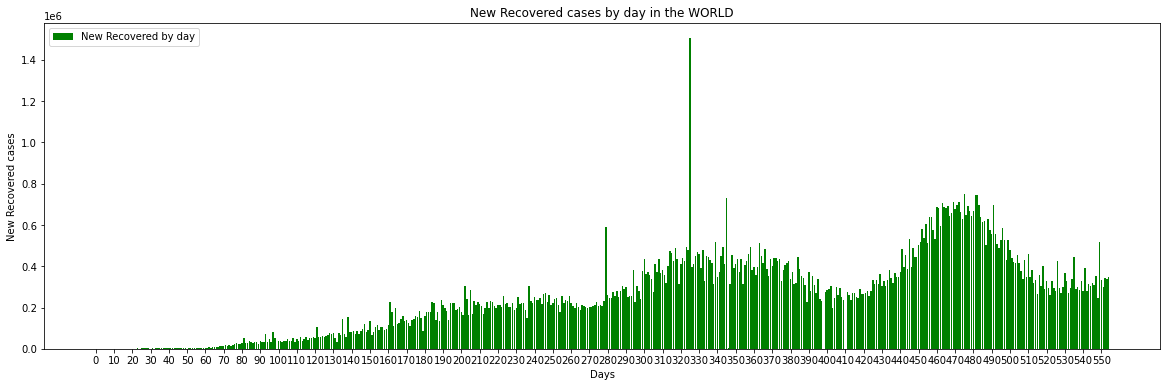

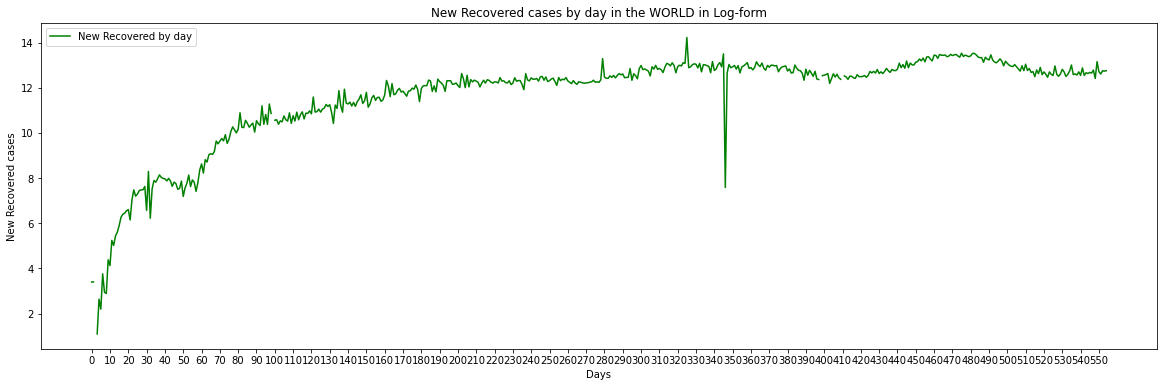

In [13]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, newRecoveredByDay, color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("New Recovered cases by day in the WORLD")
plt.legend(loc='upper left')

plt.figure(2)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.plot(x_dat, np.log(newRecoveredByDay), color='green', label="New Recovered by day")
plt.xlabel('Days')
plt.ylabel('New Recovered cases')
plt.title("New Recovered cases by day in the WORLD in Log-form")
plt.legend(loc='upper left')

('Last day Increasing', totalrecovered_by_day[-1]-totalrecovered_by_day[-2])

##### NOTE: THERE IS DATA BIAS AT DAYS with negative values

### Number of RECOVERED in the World from day 0 to latest day

Ratio recovered over Confirmed in last day (%):  65.653
Highest Ratio until now (%):  69.747


('Total Recovered until now: ', 129091225.0)

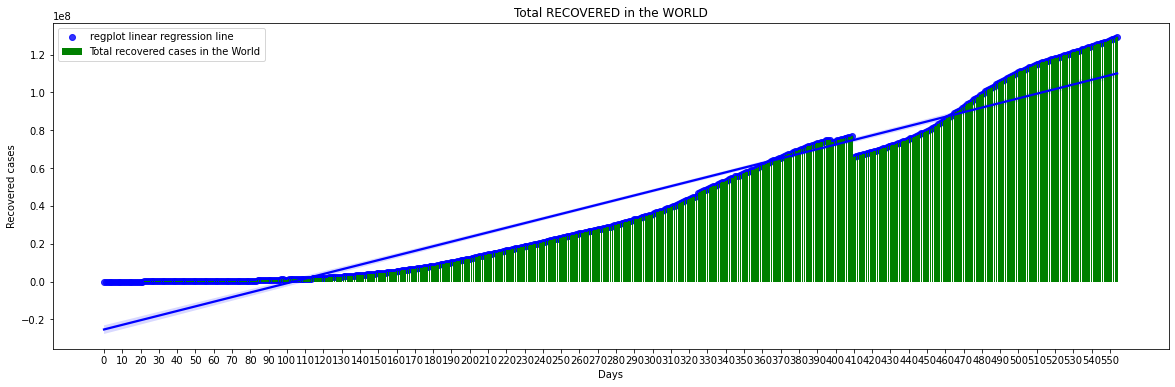

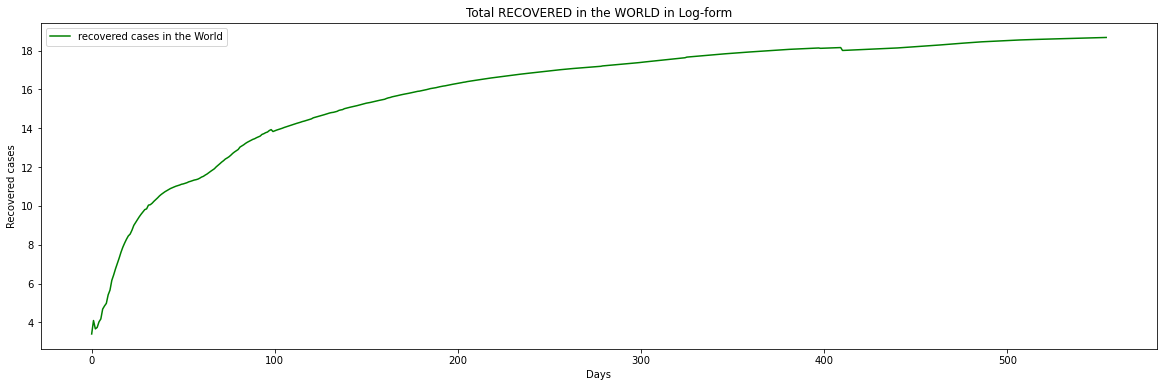

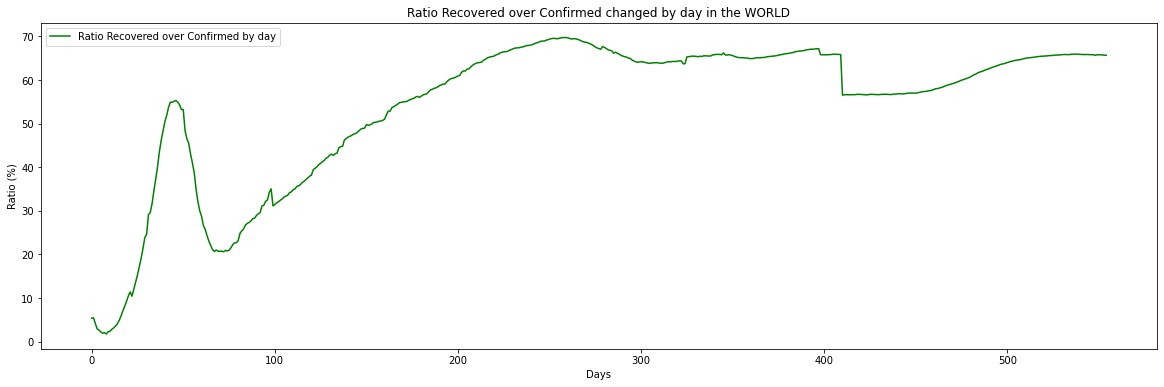

In [14]:
plt.figure(1)
plt.xticks(np.arange(0, max(x_dat)+1, 10))
plt.bar(x_dat, totalrecovered_by_day, color='green', label='Total recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
ax = sns.regplot(x=x_dat, y=totalrecovered_by_day, ci=95, label="regplot linear regression line", color="blue")
ax.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD")

plt.figure(2)
plt.plot(x_dat, np.log(totalrecovered_by_day), color='green', label='recovered cases in the World')
plt.xlabel('Days')
plt.ylabel('Recovered cases')
plt.legend(loc="upper left")
plt.title("Total RECOVERED in the WORLD in Log-form")

plt.figure(3)
plt.plot(x_dat, ratioRecByDay, color='green', label='Ratio Recovered over Confirmed by day')
plt.xlabel('Days')
plt.ylabel('Ratio (%)')
plt.title("Ratio Recovered over Confirmed changed by day in the WORLD")
plt.legend(loc='upper left')

print("Ratio recovered over Confirmed in last day (%): ", ratioRecByDay[-1])
print('Highest Ratio until now (%): ', np.max(ratioRecByDay))
('Total Recovered until now: ', totalrecovered_by_day[-1])

,China,Germany,Italy,"Korea, South",Japan,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
0,28.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,58.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,36.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,49.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
550,98979.0,3644560.0,4123209.0,167365.0,813868.0,24001.0,71117.0,18226.0,1402035.0,19342.0,842888.0
551,98999.0,3645870.0,4124323.0,167365.0,816719.0,24008.0,71490.0,18546.0,1402588.0,21344.0,843765.0
552,99022.0,3647240.0,4126741.0,170494.0,819982.0,24013.0,71497.0,18908.0,1402964.0,22946.0,844619.0
553,99048.0,3653990.0,4128568.0,171559.0,823745.0,24022.0,71631.0,19724.0,1403323.0,27457.0,845805.0


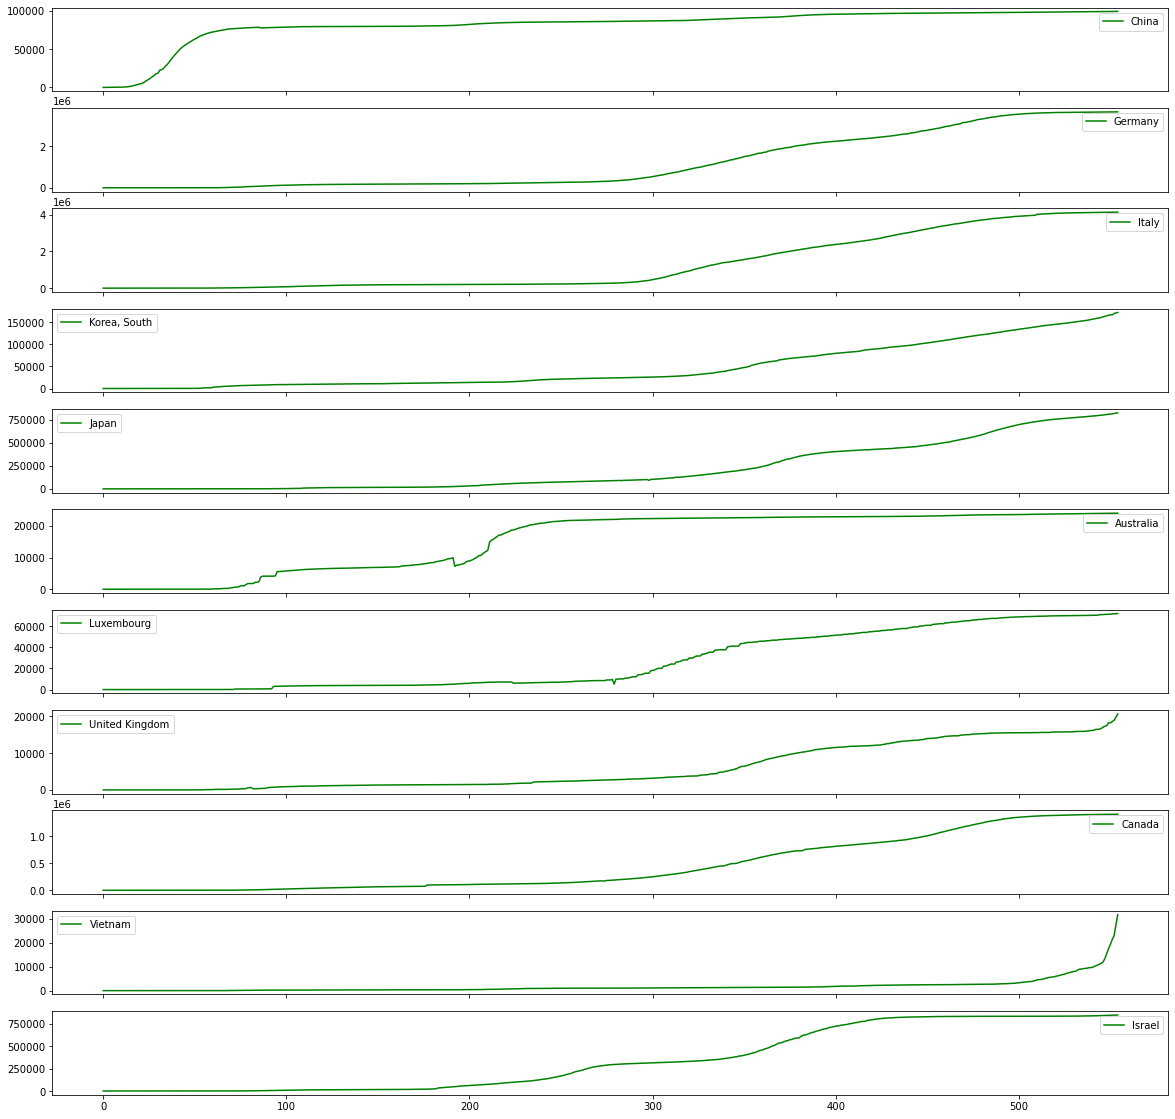

In [15]:
countries = ['China', 'Germany', 'Italy', 'Korea, South', 'Japan', 'Australia', 'Luxembourg', 'United Kingdom', 'Canada', 'Vietnam', 'Israel']

rcParams['figure.figsize'] = 20, 20
countries_recovered[countries].plot(subplots=True, legend=True, color='green')
countries_recovered[countries]

,China,Germany,Italy,"Korea, South",Japan,Australia,Luxembourg,United Kingdom,Canada,Vietnam,Israel
Last day Increasing,22.0,0.0,1825.0,1198.0,3471.0,14.0,113.0,914.0,305.0,4323.0,1159.0
Total Recovered until yesterday,99070.0,3649670.0,4130393.0,172757.0,827216.0,24036.0,71744.0,20638.0,1403628.0,31780.0,846964.0
Highest Number,3994.0,44517.0,53074.0,3129.0,10998.0,2606.0,4523.0,914.0,23848.0,4511.0,18322.0


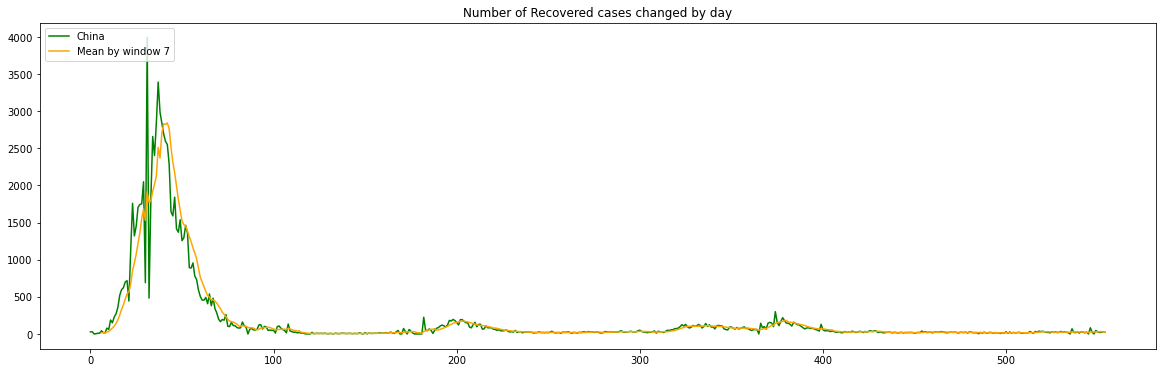

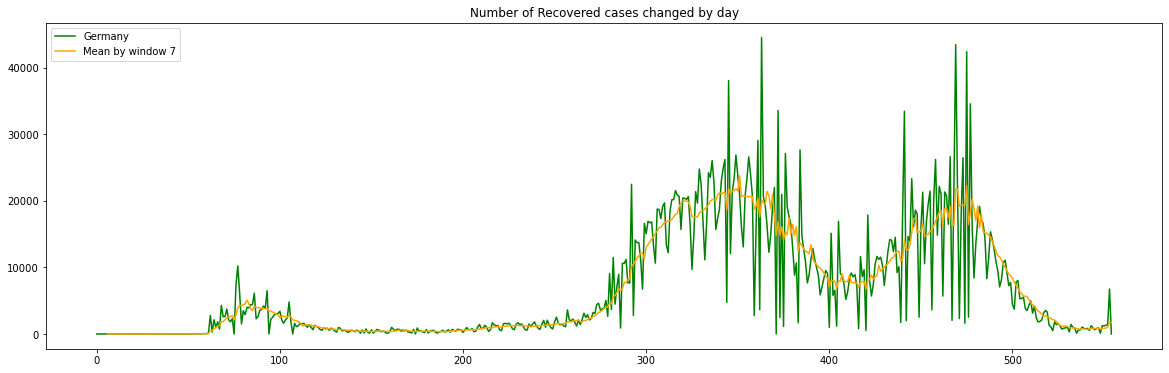

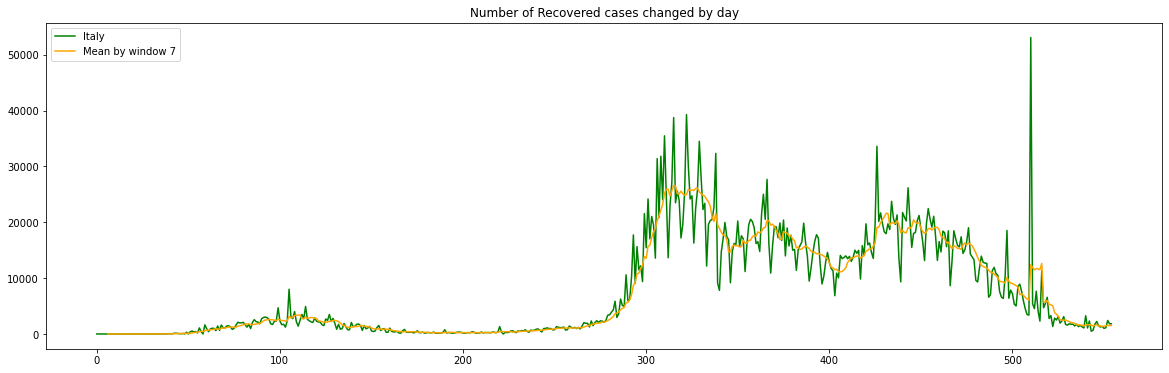

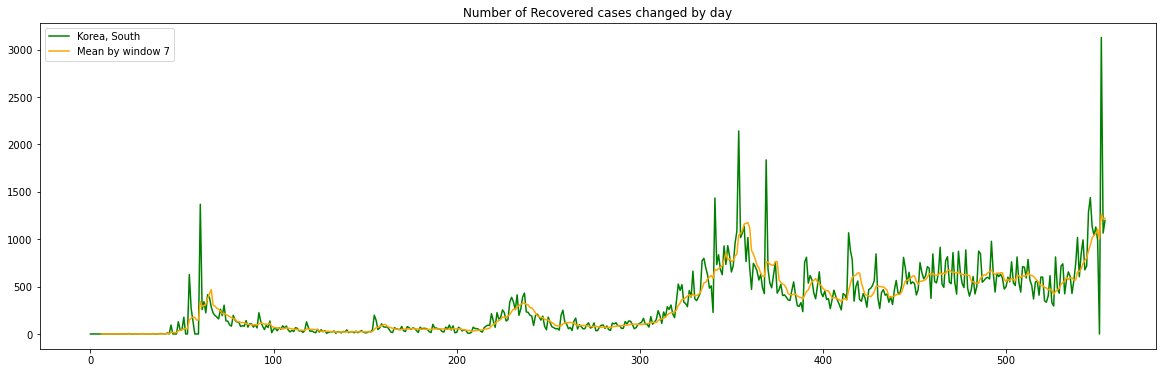

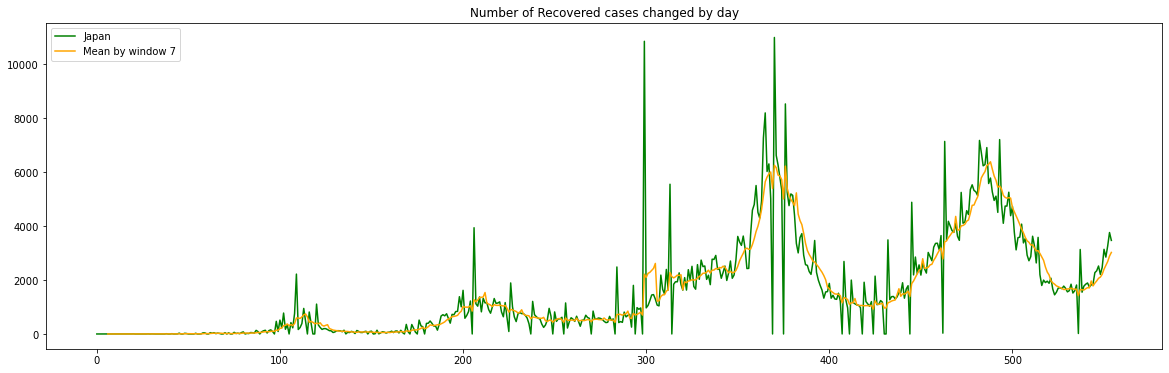

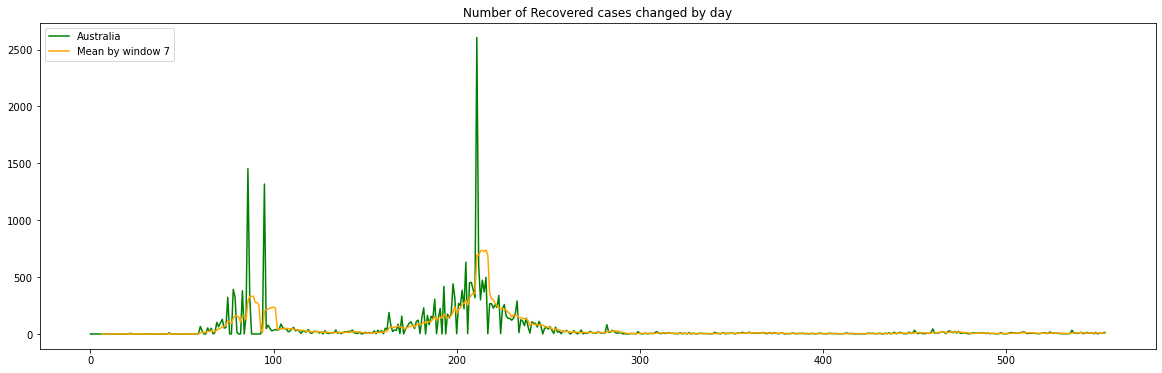

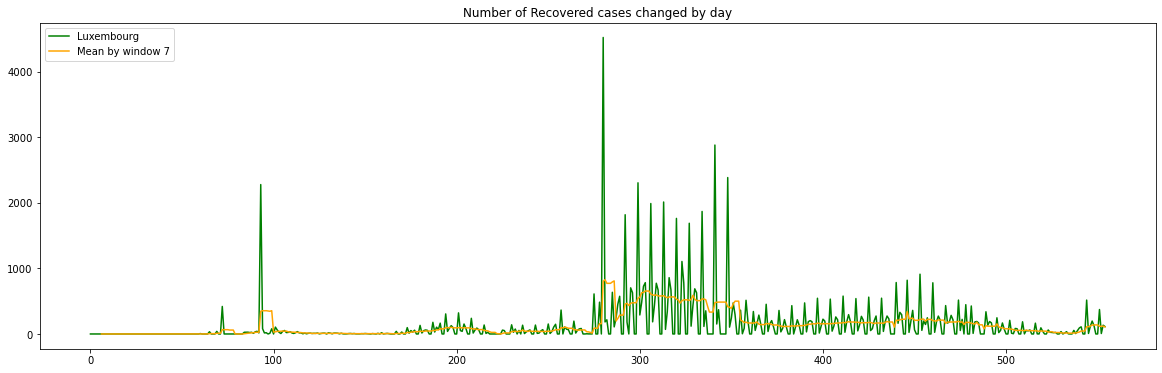

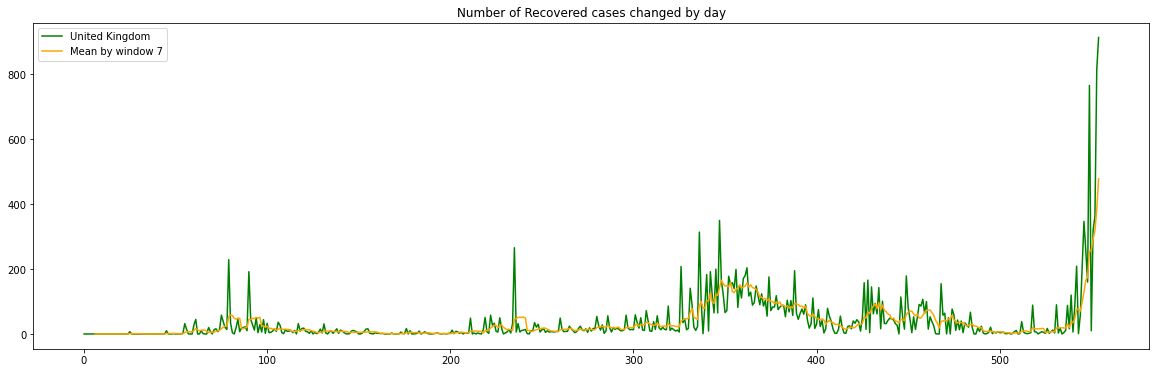

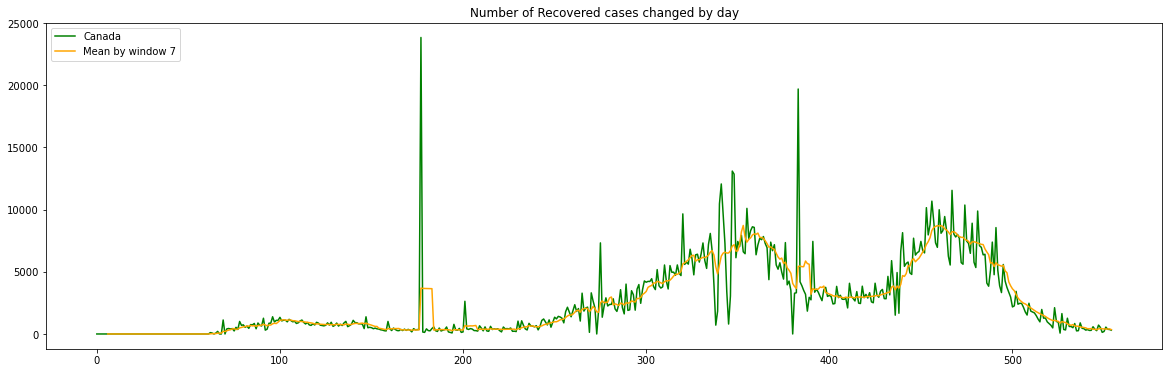

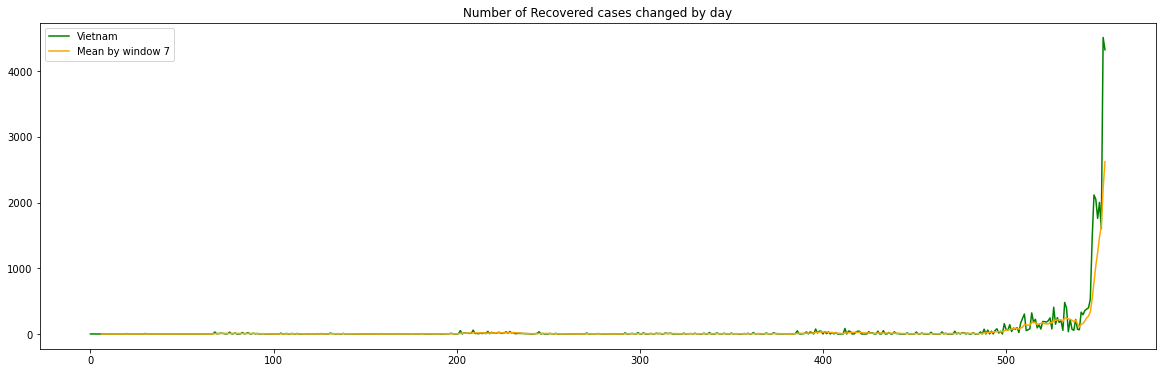

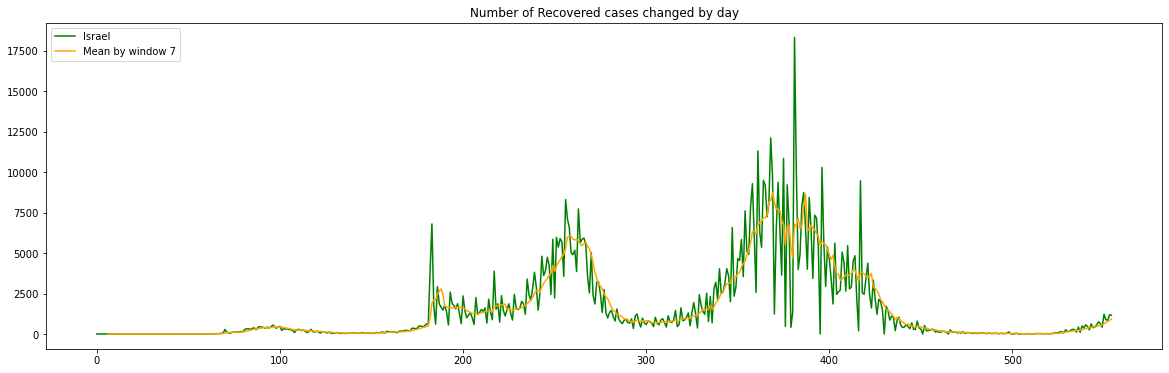

In [16]:
# time slot 7 days
window_slot = 7

countriesdf = pd.DataFrame(columns=countries, index=['Last day Increasing', 'Total Recovered until yesterday', 'Highest Number'])

for country in countries:
    countriesdf[country] = [countries_recovered_by_day[country].iloc[-1], countries_recovered[country].iloc[-1], 
                            countries_recovered_by_day[country].max()]

# Mitigate the negative values by converting all negative values to 0
countriesdf.mask(countriesdf<0, 0, inplace=True) 
countries_recovered_by_day.mask(countries_recovered_by_day<0, 0, inplace=True) 

figure = 1
rcParams['figure.figsize'] = 20, 6

for country in countries:    
    plt.figure(figure)
    countries_recovered_by_day[country].plot(color='green', label=country)
    
    roll = countries_recovered_by_day[country].rolling(window = window_slot)
    roll.mean().plot(label='Mean by window '+str(window_slot), color='orange')
    
    plt.title("Number of Recovered cases changed by day")
    plt.legend(loc='upper left')
    figure = figure+1

countriesdf

#### There are bias data found at the days when you see the scattered plot shows the negative values (<0).